#Project 2: Two weeks on LIPARI AND SICILY 
##Prepared by Angela Woodall


This is the project notebook for Week 2 of The Open University's Learn to code for Data Analysis course.

This year, we spent a few days during the the early summer on a small island off of Sicily, called Lipari. We stayed in a district called Canetto. The water was cool and clear, the air warm. 
But a few days ago we saw a video of Canetto in October. The waves crashed against the pier where months before we had stood watching boys play in the water. 

So I found the best two weeks to vacation on Lipari but wanted to know what is the island like when it isn't summer. I downloaded data for weather on Lipari between Jan. 1 and Dec. 31, 2014 to look at the highs during summer and lows in winter. 
Would Palermo be warmer year-round? To answer that question, I also looked at a year's worth of weather data -- for the same time period as Lipari -- for Sicily's capital city.


# LIPARI

In [12]:
from pandas import *
lipari = read_csv('LipariWeather.csv', skipinitialspace=True)
lipari.head()

,CET,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees<br />
0,2014-1-1,56,54,51,50,48,46,88,79,63,...,6,5,2,8,3,NaN,2.09,5,Rain,346<br />
1,2014-1-2,60,56,51,47,44,39,82,64,36,...,12,7,6,7,4,NaN,0.00,2,NaN,352<br />
2,2014-1-3,61,54,48,46,41,32,82,57,26,...,6,6,6,8,4,NaN,0.00,1,NaN,354<br />
3,2014-1-4,62,58,53,52,46,40,77,62,33,...,12,9,6,9,5,NaN,0.00,2,NaN,263<br />
4,2014-1-5,59,54,48,54,48,40,87,73,55,...,6,5,2,18,10,31,1.02,5,Rain,258<br />


##Cleaning up the dataset 

In [13]:
lipari = lipari.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})

In [14]:
lipari['WindDirDegrees'] = lipari['WindDirDegrees'].str.rstrip('<br />')

In [15]:
lipari.head() #making sure the HTML formatting '<br />' is stripped out; here pandas creates a df where the breaks were

,CET,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2014-1-1,56,54,51,50,48,46,88,79,63,...,6,5,2,8,3,NaN,2.09,5,Rain,346
1,2014-1-2,60,56,51,47,44,39,82,64,36,...,12,7,6,7,4,NaN,0.00,2,NaN,352
2,2014-1-3,61,54,48,46,41,32,82,57,26,...,6,6,6,8,4,NaN,0.00,1,NaN,354
3,2014-1-4,62,58,53,52,46,40,77,62,33,...,12,9,6,9,5,NaN,0.00,2,NaN,263
4,2014-1-5,59,54,48,54,48,40,87,73,55,...,6,5,2,18,10,31,1.02,5,Rain,258


## Changing the data types 

In [16]:
lipari['WindDirDegrees'] = lipari['WindDirDegrees'].astype('float64')  #from string object to a float 

In [17]:
lipari['CET'] = to_datetime(lipari['CET']) #GMT == CET in Italy v. of the dataset; here changing to a date data type

In [18]:
lipari.index = lipari['CET'] #changing the index to CET so we can see the months in the graph

In [19]:
lipari.head() #making sure everything looks right 

,CET,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,56,54,51,50,48,46,88,79,63,...,6,5,2,8,3,NaN,2.09,5,Rain,346
2014-01-02,2014-01-02,60,56,51,47,44,39,82,64,36,...,12,7,6,7,4,NaN,0.00,2,NaN,352
2014-01-03,2014-01-03,61,54,48,46,41,32,82,57,26,...,6,6,6,8,4,NaN,0.00,1,NaN,354
2014-01-04,2014-01-04,62,58,53,52,46,40,77,62,33,...,12,9,6,9,5,NaN,0.00,2,NaN,263
2014-01-05,2014-01-05,59,54,48,54,48,40,87,73,55,...,6,5,2,18,10,31,1.02,5,Rain,258


In [20]:
summer = lipari.ix[datetime(2014,6,1) : datetime(2014,8,31)]  #what does the data say about weather btw June1-Aug31?
summer.head(2)

,CET,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,
2014-06-01,2014-06-01,74,69,64,62,59,54,88,68,41,...,12,8,6,9,5,NaN,0,1,NaN,357
2014-06-02,2014-06-02,69,66,63,61,57,53,88,71,45,...,12,10,6,9,4,NaN,0,4,NaN,8


## How cold does it get on Lipari? 
### I tried below 45 and nothing was returned. So it appears here that the temperatures didn't drop  below 45 degrees Fahrenheit from Jan. 1 to March 31 

In [44]:
winter = lipari.ix[datetime(2014,1,1) : datetime(2014,3,31)]
winter[winter['Min TemperatureF'] <= 45] 

,CET,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,
2014-03-02,2014-03-02,57,51,45,46,40,30,93,62,26,...,12,7,2,12,6,NaN,0.35,3,Rain,272
2014-03-25,2014-03-25,57,51,45,50,44,39,96,70,43,...,12,6,2,10,6,23,0.02,5,Rain,295


###In fact, the average minimum temperature was 61F and the median was 60F. 

In [45]:
lipari['Min TemperatureF'].mean()

61.04657534246575

In [48]:
lipari['Min TemperatureF'].median()

60.0

##Now for some visualization 

In [22]:
%matplotlib inline

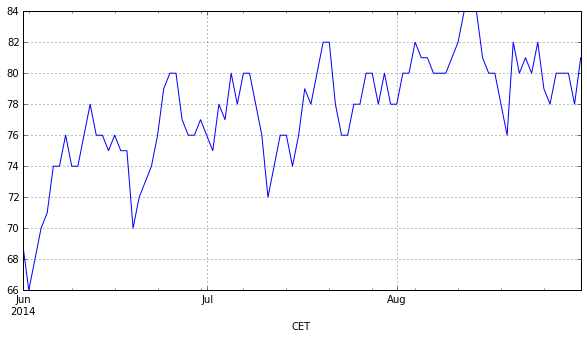

In [50]:
summer['Mean TemperatureF'].plot(grid=True, figsize=(10,5))

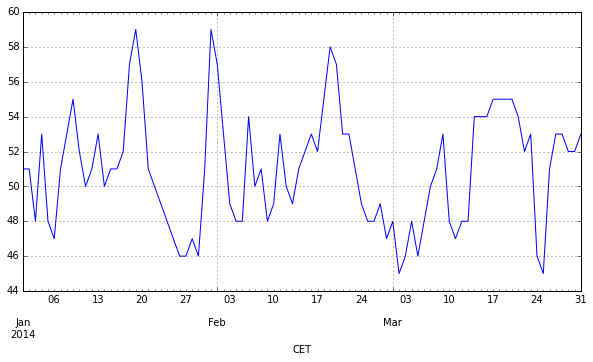

In [51]:
winter['Min TemperatureF'].plot(grid=True, figsize=(10,5))

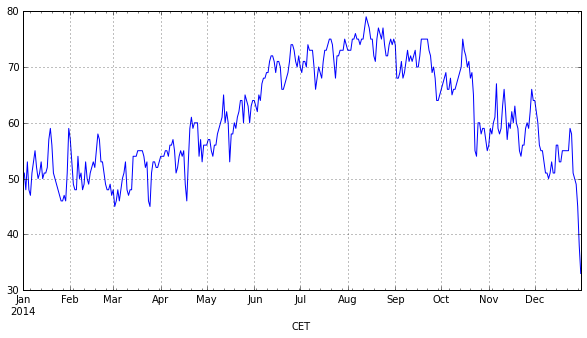

In [25]:
lipari['Min TemperatureF'].plot(grid=True, figsize=(10,5))

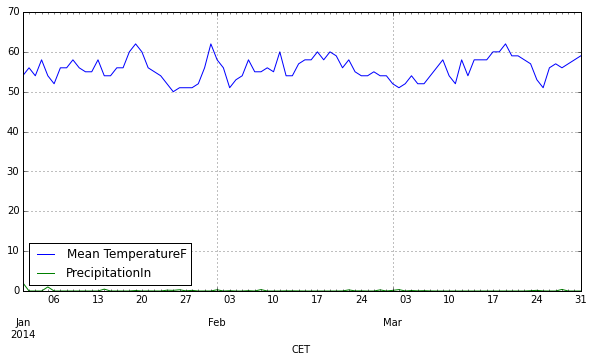

In [52]:
winter[['Mean TemperatureF', 'PrecipitationIn']].plot(grid=True, figsize=(10,5))

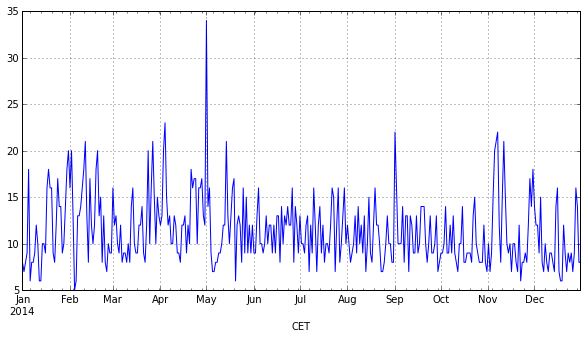

In [27]:
lipari['Max Wind SpeedMPH'].plot(grid=True, figsize=(10,5))

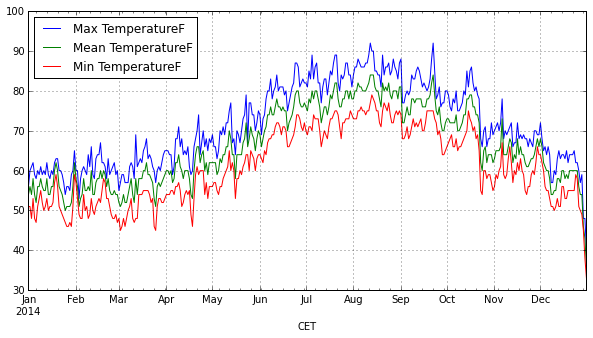

In [28]:
lipari[['Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF']].plot(grid=True, figsize=(10,5))


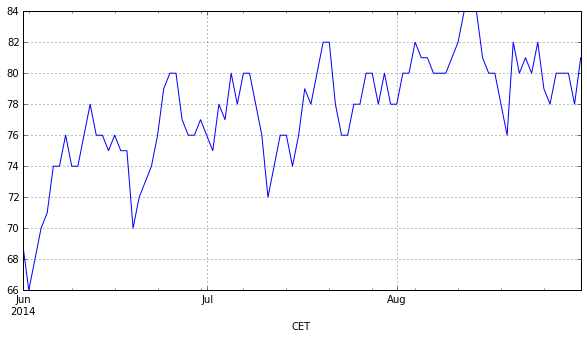

In [53]:
summer['Mean TemperatureF'].plot(grid=True, figsize=(10,5)) 

###The mean summer temp maxed out at 84F (and the max didn't get above 90F)

In [63]:
summer[summer['Mean TemperatureF'] >= 85] 

,CET,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,


In [62]:
aug = lipari.ix[datetime(2014,8,1) : datetime(2014,8,31)]  #what does the data say about weather btw Aug1-31?
aug.head(2)

,CET,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,
2014-08-01,2014-08-01,84,78,73,70,68,66,83,70,51,...,6,6,6,12,6,18,0.02,3,Rain,341
2014-08-02,2014-08-02,86,80,73,72,69,66,89,70,43,...,12,8,6,10,5,NaN,0.00,2,NaN,15


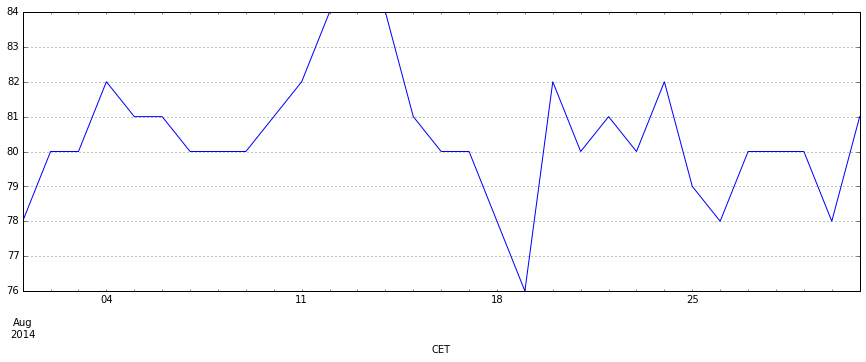

In [65]:
aug['Mean TemperatureF'].plot(grid=True, figsize=(15,5)) 

In [66]:
dec = lipari.ix[datetime(2014,12,1) : datetime(2014,12,31)]  #what does the data say about weather btw Dec. 1-31?
dec.head(2)

,CET,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,
2014-12-01,2014-12-01,72,68,64,63,58,50,94,69,41,...,6,6,2,14,9,NaN,0.02,3,Rain,253
2014-12-02,2014-12-02,68,66,62,59,56,53,83,68,51,...,6,6,6,12,9,22,0.00,1,Rain,239


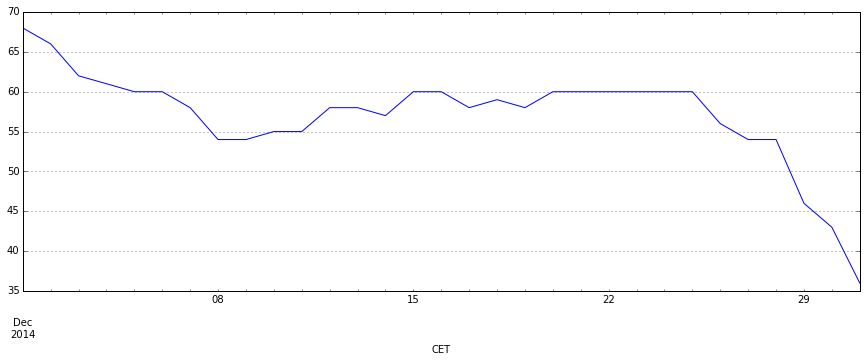

In [67]:
dec['Mean TemperatureF'].plot(grid=True, figsize=(15,5)) 

In [68]:
jan = lipari.ix[datetime(2014,1,1) : datetime(2014,1,31)]  #what does the data say about weather in January?
jan.head(2)

,CET,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,56,54,51,50,48,46,88,79,63,...,6,5,2,8,3,NaN,2.09,5,Rain,346
2014-01-02,2014-01-02,60,56,51,47,44,39,82,64,36,...,12,7,6,7,4,NaN,0.00,2,NaN,352


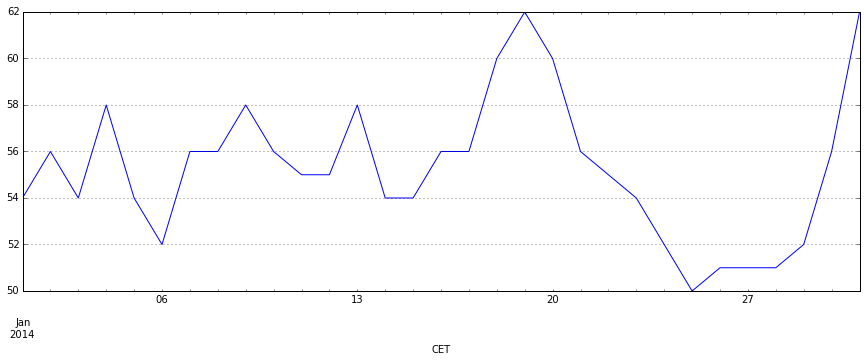

In [69]:
jan['Mean TemperatureF'].plot(grid=True, figsize=(15,5)) 

In [79]:
feb = lipari.ix[datetime(2014,2,1) : datetime(2014,2,28)]
feb.head(2)

,CET,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,
2014-02-01,2014-02-01,60,58,57,58,55,50,94,84,63,...,6,4,2,16,11,28,0.31,6,Rain,221
2014-02-02,2014-02-02,60,56,53,54,49,44,94,73,47,...,6,6,2,20,9,34,0.00,4,Rain,257


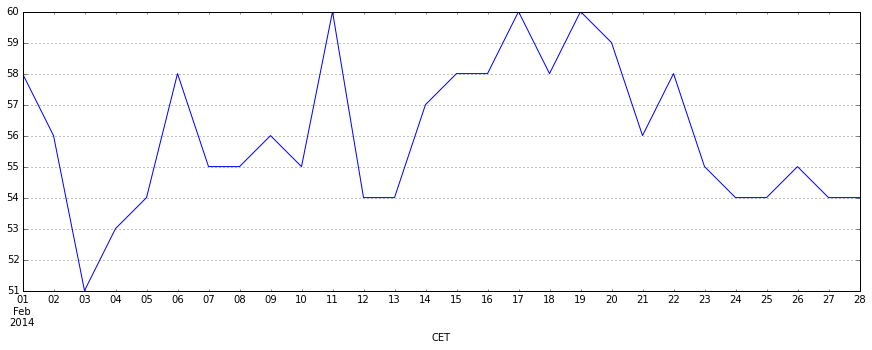

In [80]:
feb['Mean TemperatureF'].plot(grid=True, figsize=(15,5)) 

In [77]:
mar = lipari.ix[datetime(2014,3,1) : datetime(2014,3,30)]
mar.head(2)

,CET,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,
2014-03-01,2014-03-01,55,52,48,49,44,37,90,71,57,...,6,6,2,16,7,NaN,0.16,4,Rain,263
2014-03-02,2014-03-02,57,51,45,46,40,30,93,62,26,...,12,7,2,12,6,NaN,0.35,3,Rain,272


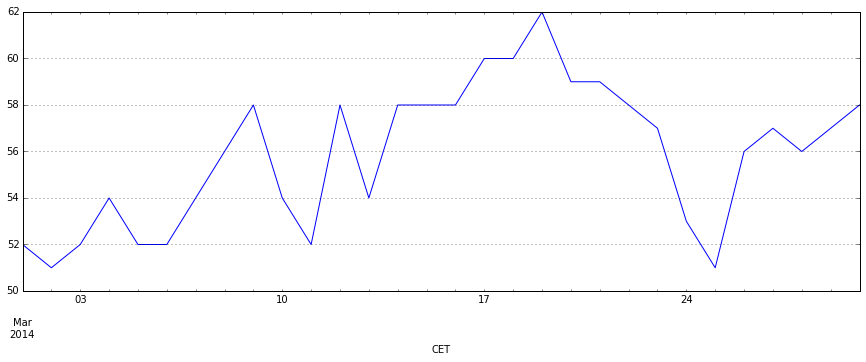

In [78]:
mar['Mean TemperatureF'].plot(grid=True, figsize=(15,5)) 

###Conclusion 
The warmest two weeks to stay on Lipari: Aug. 1-15

The coldest: January gets cold toward the end of the month and February dipped to 51F but early March overall is the coldest. 

It's not a rainy island in general so precipitation is not a factor. To summarize, Lipari is warm in the summer although temperatures did not rise above 90F in 2014, at least. However the island is chilly in the winter, defying the image of the region as temperate all year round. 

# PALERMO 

In [29]:
from pandas import *
palermo = read_csv('PalermoWeather.csv', skipinitialspace=True)
palermo.head()

,CET,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees<br />
0,2014-1-1,58,53,48,54,48,41,88,74,54,...,16,6,4,17,12,NaN,0.02,4,Rain,327<br />
1,2014-1-2,61,54,47,50,45,39,82,68,43,...,16,13,6,12,9,NaN,0.00,1,NaN,178<br />
2,2014-1-3,63,58,54,52,48,41,77,65,44,...,16,8,6,16,11,NaN,0.00,2,NaN,187<br />
3,2014-1-4,65,60,55,52,48,43,77,61,39,...,12,7,6,33,14,47,0.00,3,NaN,181<br />
4,2014-1-5,62,56,51,52,46,41,77,62,38,...,12,6,4,40,28,54,0.12,4,Rain,215<br />


In [30]:
palermo = palermo.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})
palermo['WindDirDegrees'] = palermo['WindDirDegrees'].str.rstrip('<br />')

In [31]:
palermo['Events'].isnull()

0      False
1       True
2       True
3       True
4      False
5      False
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13     False
14     False
15      True
16      True
17      True
18     False
19     False
20     False
21     False
22      True
23     False
24     False
25      True
26     False
27     False
28     False
29      True
       ...  
335     True
336    False
337     True
338    False
339    False
340    False
341    False
342    False
343    False
344     True
345     True
346     True
347     True
348     True
349    False
350    False
351    False
352     True
353     True
354     True
355     True
356     True
357     True
358     True
359    False
360    False
361    False
362    False
363    False
364    False
Name: Events, dtype: bool

In [32]:
palermo['Events'] = palermo['Events'].fillna('')

In [33]:
palermo['Events'].isnull()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
335    False
336    False
337    False
338    False
339    False
340    False
341    False
342    False
343    False
344    False
345    False
346    False
347    False
348    False
349    False
350    False
351    False
352    False
353    False
354    False
355    False
356    False
357    False
358    False
359    False
360    False
361    False
362    False
363    False
364    False
Name: Events, dtype: bool

In [34]:
palermo[palermo['Events'].isnull()]

,CET,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees


In [35]:
palermo.dropna()

,CET,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
3,2014-1-4,65,60,55,52,48,43,77,61,39,...,12,7,6,33,14,47,0.00,3,,181
4,2014-1-5,62,56,51,52,46,41,77,62,38,...,12,6,4,40,28,54,0.12,4,Rain,215
5,2014-1-6,58,54,50,50,47,45,87,74,60,...,6,6,3,23,12,33,0.12,3,Rain,52
16,2014-1-17,63,48,32,48,45,32,100,58,42,...,9,7,6,36,20,50,0.00,1,,183
17,2014-1-18,75,68,60,48,39,28,100,36,12,...,17,9,6,38,23,58,0.00,2,,176
18,2014-1-19,69,64,59,52,47,39,77,51,22,...,17,8,5,30,22,46,0.02,2,Rain,181
19,2014-1-20,61,57,53,52,48,45,88,68,46,...,9,6,2,34,25,45,0.04,5,Rain,210
20,2014-1-21,57,44,32,48,45,32,100,71,53,...,6,6,2,34,26,40,0.02,4,Rain,237
21,2014-1-22,58,54,51,48,44,41,72,64,50,...,6,6,4,30,19,33,0.00,3,Rain,207
22,2014-1-23,63,58,53,52,43,36,77,55,28,...,12,7,6,17,10,24,0.00,1,,197


### Changing the value type of a column

In [36]:
palermo.dtypes

CET                           object
Max TemperatureF               int64
Mean TemperatureF              int64
Min TemperatureF               int64
Max Dew PointF                 int64
MeanDew PointF                 int64
Min DewpointF                  int64
Max Humidity                   int64
Mean Humidity                  int64
Min Humidity                   int64
Max Sea Level PressureIn     float64
Mean Sea Level PressureIn    float64
Min Sea Level PressureIn     float64
Max VisibilityMiles            int64
Mean VisibilityMiles           int64
Min VisibilityMiles            int64
Max Wind SpeedMPH              int64
Mean Wind SpeedMPH             int64
Max Gust SpeedMPH            float64
PrecipitationIn              float64
CloudCover                   float64
Events                        object
WindDirDegrees                object
dtype: object

The type of all the values in a column can be changed using the astype() method. The following code will change the values in the 'WindDirDegrees' column from strings (object) to integers (int64).

In [37]:
palermo['WindDirDegrees'] = palermo['WindDirDegrees'].astype('int64')  

The function `to_datetime()` is needed to change the values in the `'GMT'` column from strings (`object`) to dates (`datetime64`):

In [38]:
palermo['CET'] = to_datetime(palermo['CET'])
palermo.dtypes

CET                          datetime64[ns]
Max TemperatureF                      int64
Mean TemperatureF                     int64
Min TemperatureF                      int64
Max Dew PointF                        int64
MeanDew PointF                        int64
Min DewpointF                         int64
Max Humidity                          int64
Mean Humidity                         int64
Min Humidity                          int64
Max Sea Level PressureIn            float64
Mean Sea Level PressureIn           float64
Min Sea Level PressureIn            float64
Max VisibilityMiles                   int64
Mean VisibilityMiles                  int64
Min VisibilityMiles                   int64
Max Wind SpeedMPH                     int64
Mean Wind SpeedMPH                    int64
Max Gust SpeedMPH                   float64
PrecipitationIn                     float64
CloudCover                          float64
Events                               object
WindDirDegrees                  

Values of type datetime64 can be created using the datetime() function where the first integer argument is the year, the second the month and the third the day. The code below will get and display the row in the dataframe whose 'GMT' value is 4th June 2014.

###Changing a dataframe's index

In [81]:
palermo.index = palermo['CET'] #changing the index to CET so we can see the months in the graph
palermo.head(2)

,CET,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,58,53,48,54,48,41,88,74,54,...,16,6,4,17,12,NaN,0.02,4,Rain,327
2014-01-02,2014-01-02,61,54,47,50,45,39,82,68,43,...,16,13,6,12,9,NaN,0.00,1,,178


In [115]:
summer_pal = palermo.ix[datetime(2014,6,1) : datetime(2014,8,31)]  #what does the data say about weather btw June1-Aug31?
summer_pal.head(2)

,CET,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,
2014-06-01,2014-06-01,71,66,60,61,59,55,83,74,62,...,12,6,6,16,7,NaN,0,1,,48
2014-06-02,2014-06-02,70,68,65,59,57,55,78,67,55,...,11,6,6,23,17,NaN,0,1,,64


In [120]:
winter_pal = palermo.ix[datetime(2014,1,1) : datetime(2014,2,28)]  #what does the data say about weather btw Jan1-Feb28
winter_pal.head(2)

,CET,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,58,53,48,54,48,41,88,74,54,...,16,6,4,17,12,NaN,0.02,4,Rain,327
2014-01-02,2014-01-02,61,54,47,50,45,39,82,68,43,...,16,13,6,12,9,NaN,0.00,1,,178


##Palermo's minimum and maximum mean and median temperatures are all within 10 degrees of each other, at about 60-70F

In [119]:
palermo['Min TemperatureF'].mean()


59.632876712328766

In [90]:
palermo['Min TemperatureF'].median()

60.0

In [91]:
palermo['Max TemperatureF'].mean()

71.46301369863014

In [93]:
palermo['Max TemperatureF'].median()

70.0

In [ ]:
%matplotlib inline

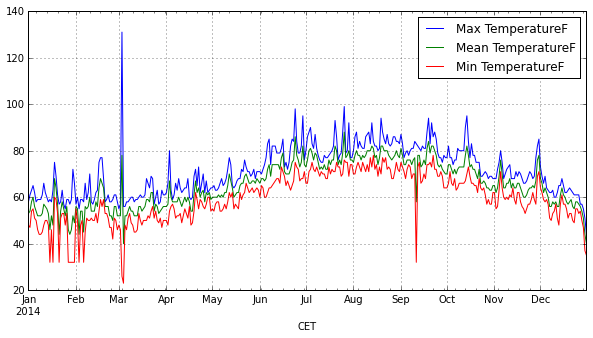

In [98]:
palermo[['Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF']].plot(grid=True, figsize=(10,5))


I don't think temperatures reached 130F so there might be an anomoly in the data

In [100]:
mar = palermo.ix[datetime(2014,3,1) : datetime(2014,3,3)] 
mar.head()

,CET,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,
2014-03-01,2014-03-01,55,52,48,46,43,36,87,68,54,...,6,6,4,30,21,46,0.12,4,Rain-Thunderstorm,219
2014-03-02,2014-03-02,57,52,46,46,42,36,87,74,56,...,6,6,3,26,16,NaN,0.16,4,Rain,190
2014-03-03,2014-03-03,131,78,26,73,45,19,88,71,58,...,6,6,4,30,10,44,0.00,4,Rain,243


Sure enough there is a typo in 3/3/2014, reporting the max temperature as 131 degrees, up from 57F the day before. (I checked the Lipari dataset and there is no temperature >=100.)

That would throw off all the overall results but since I am excluding March, I can resolve the incorrect entry later. But note that the number throws off the mean and medians for the year.

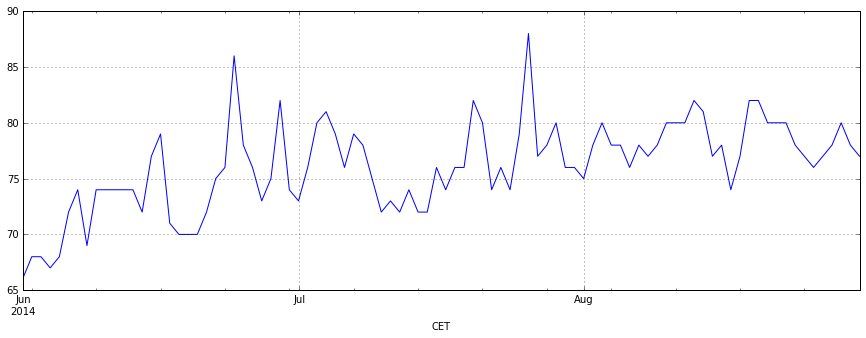

In [104]:
summer_pal['Mean TemperatureF'].plot(grid=True, figsize=(15,5)) 

In [105]:
aug_pal = palermo.ix[datetime(2014,8,1) : datetime(2014,8,31)] 

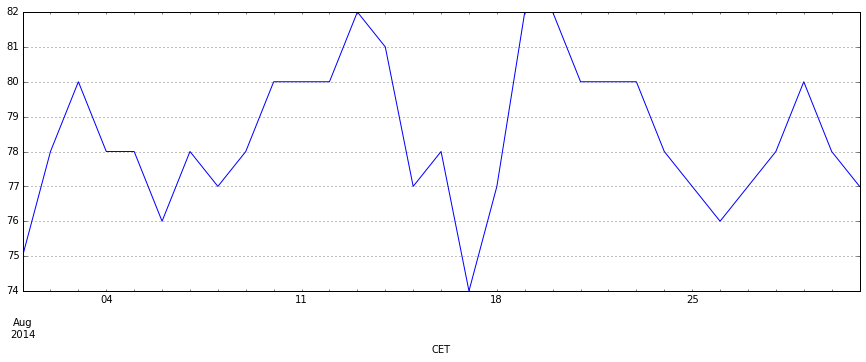

In [106]:
aug_pal['Mean TemperatureF'].plot(grid=True, figsize=(15,5))

In [110]:
summer_pal[summer_pal['Mean TemperatureF'] >= 88] #nothing over 88

,CET,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,
2014-07-26,2014-07-26,99,88,76,75,61,48,79,46,18,...,12,7,6,26,13,39,0,3,Rain-Thunderstorm,202


In [112]:
summer_pal[summer_pal['Max TemperatureF'] >= 99] #one day >=99 in summer 2014

,CET,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,
2014-07-26,2014-07-26,99,88,76,75,61,48,79,46,18,...,12,7,6,26,13,39,0,3,Rain-Thunderstorm,202


In [142]:
july_pal = palermo.ix[datetime(2014,7,1) : datetime(2014,7,31)] 
july_pal[july_pal['Max TemperatureF'] >=90]

,CET,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,
2014-07-04,2014-07-04,90,81,72,75,69,61,94,70,29,...,17,17,17,17,6,NaN,0,NaN,,29
2014-07-20,2014-07-20,93,82,71,75,68,57,89,67,27,...,12,12,12,17,6,NaN,0,NaN,,137
2014-07-26,2014-07-26,99,88,76,75,61,48,79,46,18,...,12,7,6,26,13,39,0,3,Rain-Thunderstorm,202
2014-07-29,2014-07-29,92,80,69,73,62,43,73,53,17,...,12,8,6,33,7,43,0,NaN,,206


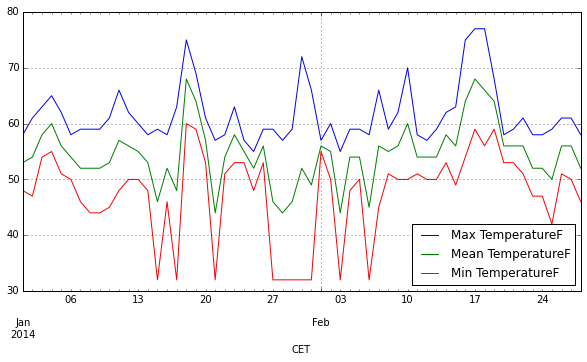

In [121]:
winter_pal[['Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF']].plot(grid=True, figsize=(10,5))

In [126]:
winter_pal[winter_pal['Mean TemperatureF'] <=44] 

,CET,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,
2014-01-21,2014-01-21,57,44,32,48,45,32,100,71,53,...,6,6,2,34,26,40,0.02,4,Rain,237
2014-01-28,2014-01-28,57,44,32,50,42,12,100,66,18,...,6,6,6,33,18,31,0.01,3,Rain,286
2014-02-03,2014-02-03,55,44,32,50,45,32,100,75,56,...,6,6,4,25,16,38,0.08,4,Rain,235


In [127]:
jan_pal = palermo.ix[datetime(2014,1,1) : datetime(2014,1,31)] 

In [138]:
jan_pal[jan_pal['Min TemperatureF'] <=33]

,CET,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,
2014-01-15,2014-01-15,59,46,32,50,47,32,100,77,56,...,9,6,5,14,10,NaN,0.00,4,Rain,197
2014-01-17,2014-01-17,63,48,32,48,45,32,100,58,42,...,9,7,6,36,20,50,0.00,1,,183
2014-01-21,2014-01-21,57,44,32,48,45,32,100,71,53,...,6,6,2,34,26,40,0.02,4,Rain,237
2014-01-27,2014-01-27,59,46,32,54,45,32,100,73,46,...,12,6,4,22,13,31,0.16,4,Rain,216
2014-01-28,2014-01-28,57,44,32,50,42,12,100,66,18,...,6,6,6,33,18,31,0.01,3,Rain,286
2014-01-29,2014-01-29,59,46,32,46,41,32,100,63,41,...,12,7,6,25,16,31,0.00,2,Rain,196
2014-01-30,2014-01-30,72,52,32,50,38,32,100,38,16,...,12,7,6,33,20,50,0.00,2,,163
2014-01-31,2014-01-31,66,49,32,55,49,32,100,66,20,...,6,5,4,23,12,34,0.00,4,Rain,262


In [145]:
winter_pal[winter_pal['Mean TemperatureF'] <= 50]

,CET,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,
2014-01-15,2014-01-15,59,46,32,50,47,32,100,77,56,...,9,6,5,14,10,NaN,0.00,4,Rain,197
2014-01-17,2014-01-17,63,48,32,48,45,32,100,58,42,...,9,7,6,36,20,50,0.00,1,,183
2014-01-21,2014-01-21,57,44,32,48,45,32,100,71,53,...,6,6,2,34,26,40,0.02,4,Rain,237
2014-01-27,2014-01-27,59,46,32,54,45,32,100,73,46,...,12,6,4,22,13,31,0.16,4,Rain,216
2014-01-28,2014-01-28,57,44,32,50,42,12,100,66,18,...,6,6,6,33,18,31,0.01,3,Rain,286
2014-01-29,2014-01-29,59,46,32,46,41,32,100,63,41,...,12,7,6,25,16,31,0.00,2,Rain,196
2014-01-31,2014-01-31,66,49,32,55,49,32,100,66,20,...,6,5,4,23,12,34,0.00,4,Rain,262
2014-02-03,2014-02-03,55,44,32,50,45,32,100,75,56,...,6,6,4,25,16,38,0.08,4,Rain,235
2014-02-06,2014-02-06,58,45,32,54,47,32,100,73,53,...,17,7,5,28,19,39,0.00,2,,235


In [132]:
feb_pal = palermo.ix[datetime(2014,2,1) : datetime(2014,2,28)] 

In [139]:
feb_pal[feb_pal['Min TemperatureF'] <= 33]

,CET,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,
2014-02-03,2014-02-03,55,44,32,50,45,32,100,75,56,...,6,6,4,25,16,38,0.08,4,Rain,235
2014-02-06,2014-02-06,58,45,32,54,47,32,100,73,53,...,17,7,5,28,19,39,0.00,2,,235


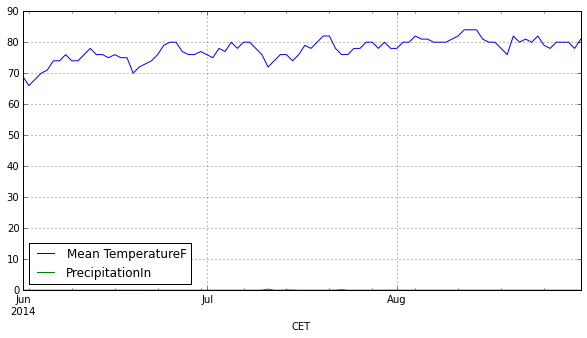

In [146]:
summer[['Mean TemperatureF', 'PrecipitationIn']].plot(grid=True, figsize=(10,5))

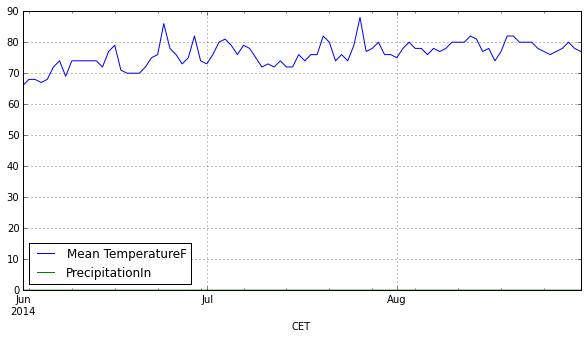

In [147]:
summer_pal[['Mean TemperatureF', 'PrecipitationIn']].plot(grid=True, figsize=(10,5))

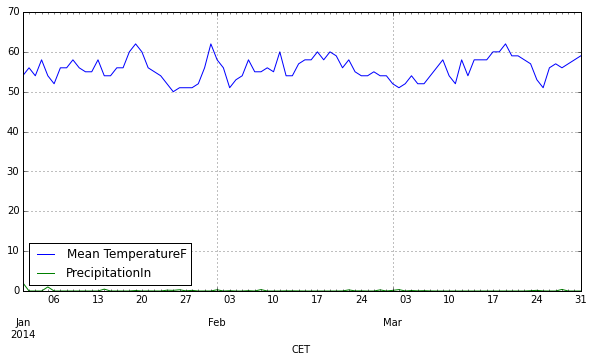

In [148]:
winter[['Mean TemperatureF', 'PrecipitationIn']].plot(grid=True, figsize=(10,5))

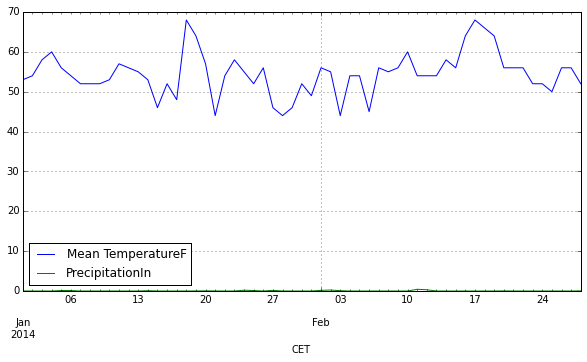

In [149]:
winter_pal[['Mean TemperatureF', 'PrecipitationIn']].plot(grid=True, figsize=(10,5))

##Conclusion
Excluding March, the coldest two weeks in 2014 were at the end of January in terms of raw minimum degrees analyzed and the minimum mean temperature for January through February. 
The warmest, the last two weeks in July. 

But it appears Palermo's minimum tempreratures dip lower than Lipari's: by about 10 degrees. More often -- 10 days in January and February -- the mean temperature was below 50 degrees F, whereas on Lipari only one day did the mean temperature fall below 50. And the winds pick up stronger in Palermo than Lipari. However, the rainfall is negligible in both places. 

So the overall conclusion I have reached is that I need to find a different place for winter. 

In [150]:
winter_pal[winter_pal['Mean TemperatureF'] <= 50]

,CET,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,
2014-01-15,2014-01-15,59,46,32,50,47,32,100,77,56,...,9,6,5,14,10,NaN,0.00,4,Rain,197
2014-01-17,2014-01-17,63,48,32,48,45,32,100,58,42,...,9,7,6,36,20,50,0.00,1,,183
2014-01-21,2014-01-21,57,44,32,48,45,32,100,71,53,...,6,6,2,34,26,40,0.02,4,Rain,237
2014-01-27,2014-01-27,59,46,32,54,45,32,100,73,46,...,12,6,4,22,13,31,0.16,4,Rain,216
2014-01-28,2014-01-28,57,44,32,50,42,12,100,66,18,...,6,6,6,33,18,31,0.01,3,Rain,286
2014-01-29,2014-01-29,59,46,32,46,41,32,100,63,41,...,12,7,6,25,16,31,0.00,2,Rain,196
2014-01-31,2014-01-31,66,49,32,55,49,32,100,66,20,...,6,5,4,23,12,34,0.00,4,Rain,262
2014-02-03,2014-02-03,55,44,32,50,45,32,100,75,56,...,6,6,4,25,16,38,0.08,4,Rain,235
2014-02-06,2014-02-06,58,45,32,54,47,32,100,73,53,...,17,7,5,28,19,39,0.00,2,,235


In [151]:
winter[winter['Mean TemperatureF'] <= 50]

,CET,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,
2014-01-25,2014-01-25,54,50,47,47,43,38,93,72,52,...,6,6,2,14,7,29,0.16,4,Rain,317


In [152]:
lipari[lipari['Max TemperatureF'] >= 100] 

,CET,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,


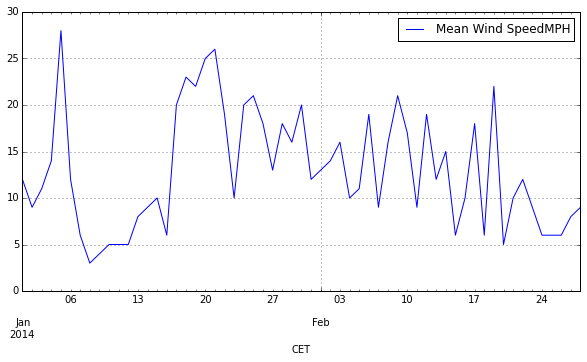

In [153]:
winter_pal[['Mean Wind SpeedMPH']].plot(grid=True, figsize=(10,5)) 

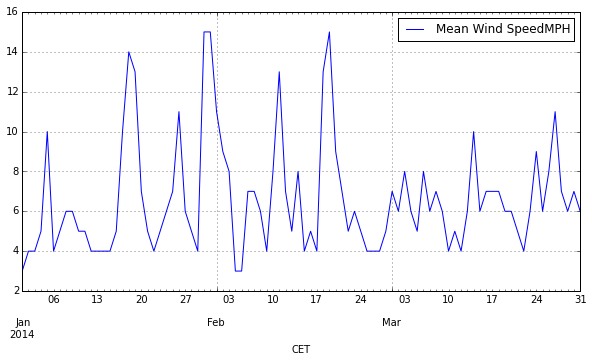

In [154]:
winter[['Mean Wind SpeedMPH']].plot(grid=True, figsize=(10,5)) 